# DD2421 Machine Learning: Programming Challenge

In [109]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                               ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifierCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import time

In [110]:
df = pd.read_csv('TrainOnMe_orig.csv')
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,Jorgsuto,99.62776,-0.74730,-106.04085,-1.21694,199.59889,-88.84034,Slängpolskorgris,1.36603,2.62967,12.17710,-3.38007,True,445.11836
1,Andjorg,100.22296,0.85161,-98.91119,-1.23724,200.19240,-89.88662,Polkagris,-2.23901,0.65370,10.72266,-2.38136,True,451.65919
2,Andsuto,100.12711,0.22396,-96.58029,-1.18725,200.10113,-89.18542,Polkagris,0.38295,-0.58657,12.60082,-1.28045,True,452.34540
3,Jorgsuto,100.81843,0.02120,-102.78871,-1.26271,200.78442,-92.00700,Polkagris,-0.28207,0.81744,13.57450,0.12083,True,452.69780
4,Jorgsuto,101.07489,1.18863,-101.29639,-1.23077,201.04424,-92.83613,Schottisgris,1.31717,0.69887,12.50238,-0.71997,True,454.72627


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   object 
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   float64
 4   x4      1000 non-null   float64
 5   x5      1000 non-null   float64
 6   x6      1000 non-null   float64
 7   x7      1000 non-null   object 
 8   x8      1000 non-null   float64
 9   x9      1000 non-null   float64
 10  x10     1000 non-null   float64
 11  x11     1000 non-null   float64
 12  x12     1000 non-null   bool   
 13  x13     1000 non-null   float64
dtypes: bool(1), float64(11), object(2)
memory usage: 102.7+ KB


In [ ]:
df.isna().any().any()   # True 代表表里存在至少一个 NaN/NaT

False

In [113]:
df.shape

(1000, 14)

In [114]:
df.drop_duplicates().shape

(1000, 14)

In [115]:
df.isnull().sum()


y      0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
dtype: int64

In [116]:
df.describe(include="all")

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,1,NaN
top,Andjorg,NaN,NaN,NaN,NaN,NaN,NaN,Polkagris,NaN,NaN,NaN,NaN,True,NaN
freq,409,NaN,NaN,NaN,NaN,NaN,NaN,354,NaN,NaN,NaN,NaN,1000,NaN
mean,NaN,99.993529,-0.031665,-99.888428,-1.220940,199.964456,-91.144009,NaN,-0.035310,-0.037093,11.143083,-0.413786,NaN,450.023429
std,NaN,1.018963,0.693256,3.129413,0.018171,1.018922,1.815208,NaN,1.182681,1.179131,1.394928,2.240144,NaN,4.814188
min,NaN,96.767340,-2.024930,-109.093810,-1.263190,196.739280,-98.264480,NaN,-4.724160,-4.147470,6.656990,-5.813600,NaN,433.837720
25%,NaN,99.330040,-0.487903,-102.059513,-1.234290,199.302648,-92.387215,NaN,-0.758445,-0.769328,10.221473,-2.056707,NaN,446.654358
50%,NaN,100.025040,-0.032270,-99.924990,-1.224930,199.996185,-91.073750,NaN,0.001310,-0.011950,11.193020,-0.793700,NaN,450.181500
75%,NaN,100.689257,0.461008,-97.773022,-1.206632,200.659110,-89.931027,NaN,0.732220,0.676998,12.003478,1.290030,NaN,453.389245


In [117]:
df['y'].value_counts()

Andjorg     409
Andsuto     334
Jorgsuto    257
Name: y, dtype: int64

In [118]:
df['x7'].value_counts()

Polkagris           354
Slängpolskorgris    332
Hambogris           158
Schottisgris        135
Polskorgris          21
Name: x7, dtype: int64

In [119]:
df['x12'].value_counts()


True    1000
Name: x12, dtype: int64

Each category within the y column has the following count:
y
Andjorg     409
Andsuto     334
Jorgsuto    257
dtype: int64


Text(0, 0.5, 'Frequency')

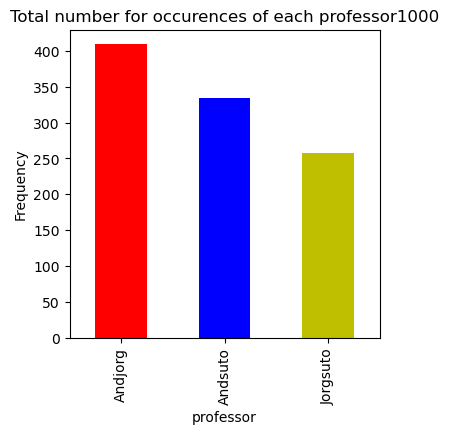

In [ ]:
print("Each category within the y column has the following count:")
print(df.groupby(['y']).size())

# bar chart to show split of data
index = ('Andjorg', 'Andsuto', 'Jorgsuto')
lec_plot = df['y'].value_counts(sort=True, ascending=False).plot(kind='bar',figsize=(4,4), 
                                                                    title='Total number for occurences of labels: '
                                                                    + str(df['y'].count()), color=['r', 'b', 'y'])
lec_plot.set_xlabel('labels')
lec_plot.set_ylabel('Frequency')

## Preprocess categorical input variables

In [121]:
unique_value_count = df['x12'].nunique()
print(f"The 'x12' column has {unique_value_count} unique value(s).")
if unique_value_count == 1:
    # axis=1 specifies we are dropping a column
    # inplace=True modifies the DataFrame directly
    df.drop('x12', axis=1, inplace=True)
    print("Column 'x12' has been successfully removed.")

The 'x12' column has 1 unique value(s).
Column 'x12' has been successfully removed.


In [122]:
# One hot coding for x7
# drop_first=True: To Avoid Multicollinearity (For Linear Models)
df_dummy = pd.get_dummies(df['x7'], prefix='x7',drop_first=True)
df = pd.concat([df, df_dummy], axis=1).drop(['x7'], axis=1)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   y                    1000 non-null   object 
 1   x1                   1000 non-null   float64
 2   x2                   1000 non-null   float64
 3   x3                   1000 non-null   float64
 4   x4                   1000 non-null   float64
 5   x5                   1000 non-null   float64
 6   x6                   1000 non-null   float64
 7   x8                   1000 non-null   float64
 8   x9                   1000 non-null   float64
 9   x10                  1000 non-null   float64
 10  x11                  1000 non-null   float64
 11  x13                  1000 non-null   float64
 12  x7_Polkagris         1000 non-null   uint8  
 13  x7_Polskorgris       1000 non-null   uint8  
 14  x7_Schottisgris      1000 non-null   uint8  
 15  x7_Slängpolskorgris  1000 non-null   ui

In [124]:
# encoder = ce.OrdinalEncoder(cols=['x7'])
# df = encoder.fit_transform(df)

<Axes: >

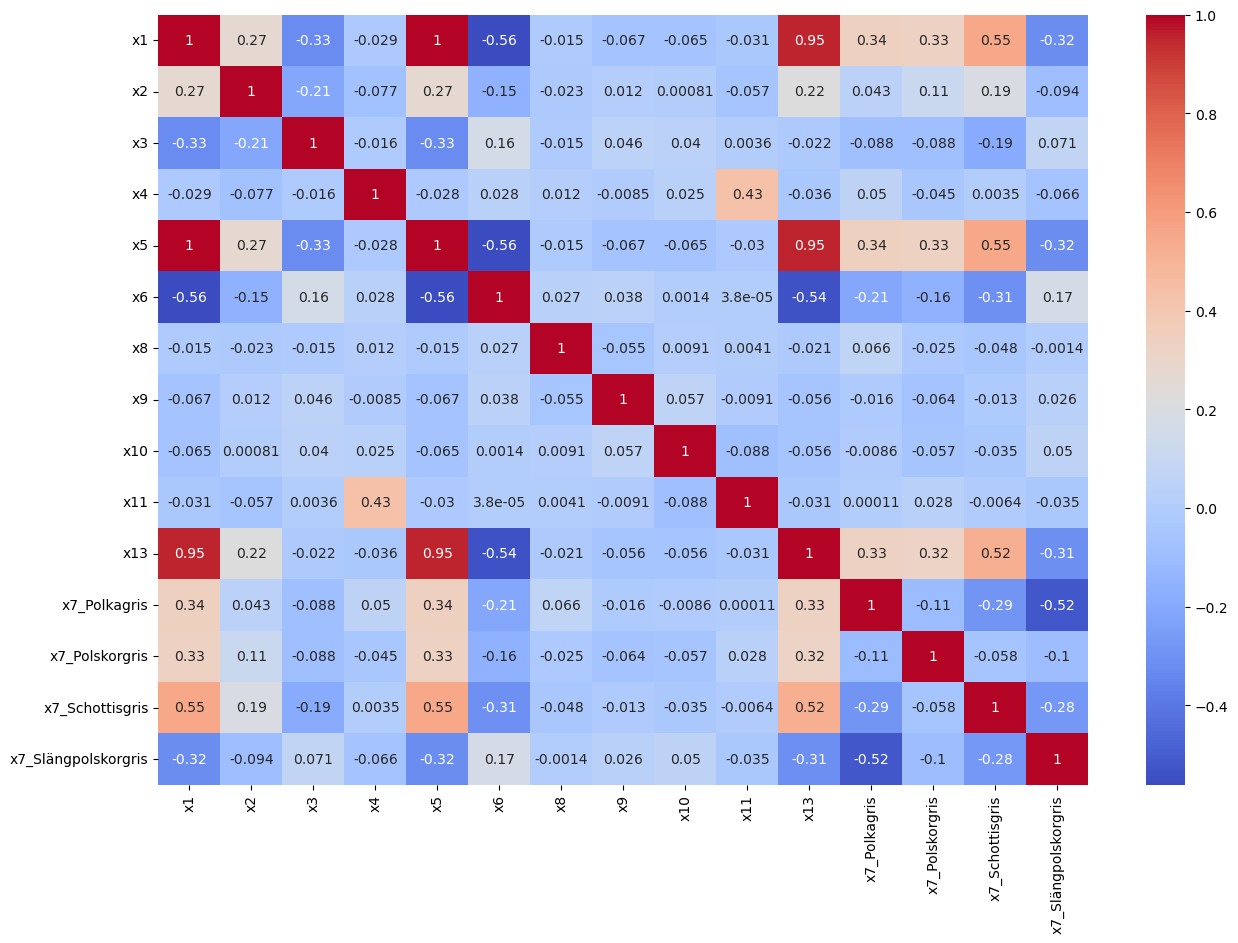

In [125]:
correlation = df[['x1','x2','x3','x4','x5','x6','x8','x9','x10','x11','x13',
                  'x7_Polkagris','x7_Polskorgris', 'x7_Schottisgris','x7_Slängpolskorgris']].corr()
plt.figure(figsize=(15,10))
sb.heatmap(correlation, cmap='coolwarm', annot = True)

In [126]:
# Drop redundant variables
df_clean = df.drop(['x5', 'x13'], axis=1)

In [127]:
df_clean.describe()


,x1,x2,x3,x4,x6,x8,x9,x10,x11,x7_Polkagris,x7_Polskorgris,x7_Schottisgris,x7_Slängpolskorgris
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,99.993529,-0.031665,-99.888428,-1.220940,-91.144009,-0.035310,-0.037093,11.143083,-0.413786,0.354000,0.021000,0.135000,0.332000
std,1.018963,0.693256,3.129413,0.018171,1.815208,1.182681,1.179131,1.394928,2.240144,0.478448,0.143456,0.341895,0.471167
min,96.767340,-2.024930,-109.093810,-1.263190,-98.264480,-4.724160,-4.147470,6.656990,-5.813600,0.000000,0.000000,0.000000,0.000000
25%,99.330040,-0.487903,-102.059513,-1.234290,-92.387215,-0.758445,-0.769328,10.221473,-2.056707,0.000000,0.000000,0.000000,0.000000
50%,100.025040,-0.032270,-99.924990,-1.224930,-91.073750,0.001310,-0.011950,11.193020,-0.793700,0.000000,0.000000,0.000000,0.000000
75%,100.689257,0.461008,-97.773022,-1.206632,-89.931027,0.732220,0.676998,12.003478,1.290030,1.000000,0.000000,0.000000,1.000000
max,102.966790,2.040840,-89.944590,-1.174250,-84.654060,3.348100,4.264500,16.056040,5.947660,1.000000,1.000000,1.000000,1.000000


In [128]:
X = df_clean.drop(['y'], axis=1)
y= df_clean['y']

# cross validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 分出验证集
RANDOM_STATE = 42
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [129]:
# 设置随机种子
RANDOM_STATE = 42

# 2. 定义所有分类器
classifiers = {
    "K-neighbours": KNeighborsClassifier(),
    "Decision tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "Random forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "Extremely random forest": ExtraTreesClassifier(random_state=RANDOM_STATE),
    "Adaboost": AdaBoostClassifier(random_state=RANDOM_STATE),
    "Bagging": BaggingClassifier(random_state=RANDOM_STATE),
    "MLP": MLPClassifier(max_iter=2000, hidden_layer_sizes=(20,20), random_state=RANDOM_STATE),
    "SVM (rbf)": SVC(random_state=RANDOM_STATE),
    "SVM (linear)": SVC(kernel="linear", random_state=RANDOM_STATE),
    "SVM (polynomial)": SVC(kernel="poly", random_state=RANDOM_STATE),
    "Ridge Classifier": RidgeClassifierCV()
}

# 3. 存储结果
results = []

for clf_name, clf in classifiers.items():
    print(f"Training: {clf_name}...")
    
    # 交叉验证
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=skf, n_jobs=-1)
    
    # 训练并评估
    clf.fit(X_train_scaled, y_train)
    y_val_pred = clf.predict(X_val_scaled)
    
    val_acc = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    results.append({
        'Classifier': clf_name,
        'CV_Mean': cv_scores.mean(),
        'CV_Std': cv_scores.std(),
        'Val_Accuracy': val_acc,
        'Val_F1': val_f1
    })

results_df = pd.DataFrame(results).sort_values('Val_Accuracy', ascending=False)
print("\n" + "="*70)
print(results_df.to_string(index=False))

# ============================================
# 4. 用最佳模型对测试集进行预测
# ============================================
best_model_name = results_df.iloc[0]['Classifier']
best_clf = classifiers[best_model_name]

print(f"\n Best Model: {best_model_name}")

# 用全部训练数据重新训练
scaler_final = StandardScaler()
X_all_scaled = scaler_final.fit_transform(X)
best_clf.fit(X_all_scaled, y)



Training: K-neighbours...
Training: Decision tree...
Training: Random forest...
Training: Gradient Boosting...
Training: Extremely random forest...
Training: Adaboost...
Training: Bagging...
Training: MLP...
Training: SVM (rbf)...
Training: SVM (linear)...
Training: SVM (polynomial)...
Training: Ridge Classifier...

             Classifier  CV_Mean   CV_Std  Val_Accuracy   Val_F1
      Gradient Boosting  0.86125 0.025890         0.840 0.832099
Extremely random forest  0.84125 0.020194         0.820 0.803224
              SVM (rbf)  0.82125 0.016817         0.820 0.809064
          Random forest  0.87125 0.030644         0.810 0.801870
                Bagging  0.85000 0.021651         0.790 0.782729
           K-neighbours  0.74000 0.029475         0.775 0.741310
               Adaboost  0.78250 0.035882         0.770 0.766514
           SVM (linear)  0.72625 0.039706         0.770 0.751654
                    MLP  0.78875 0.036422         0.765 0.757484
       SVM (polynomial)  0.73750

GradientBoostingClassifier(random_state=42)

In [130]:
test_df = pd.read_csv('EvaluateOnMe.csv')
test_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,99.34096,-0.67540,-96.38556,-1.19631,199.31533,-86.16157,Slängpolskorgris,0.62378,0.42649,12.10197,3.43177,True,448.51202
1,100.60896,0.18439,-102.61094,-1.23638,200.57851,-93.29574,Polkagris,0.74169,0.25590,11.12800,-3.63810,True,451.73934
2,100.10018,0.48681,-101.76163,-1.25433,200.06768,-91.08115,Polkagris,-1.75279,0.76439,12.83530,-0.52512,True,449.62008
3,100.01433,0.80652,-96.01828,-1.22024,199.98485,-90.82540,Polkagris,0.37051,0.75879,9.54447,0.20145,True,452.06249
4,99.09649,0.65778,-100.90883,-1.20198,199.06899,-86.97312,Slängpolskorgris,-1.52795,-0.49527,11.04676,1.36818,True,445.02802


In [131]:
unique_value_count = test_df['x12'].nunique()
print(f"The 'x12' column has {unique_value_count} unique value(s).")
if unique_value_count == 1:
    # axis=1 specifies we are dropping a column
    # inplace=True modifies the DataFrame directly
    test_df.drop('x12', axis=1, inplace=True)
    print("Column 'x12' has been successfully removed.")

The 'x12' column has 1 unique value(s).
Column 'x12' has been successfully removed.


In [132]:
# One hot coding for x7
# drop_first=True: To Avoid Multicollinearity (For Linear Models)
test_df_dummy = pd.get_dummies(test_df['x7'], prefix='x7',drop_first=True)
test_df = pd.concat([test_df, test_df_dummy], axis=1).drop(['x7'], axis=1)

In [133]:
# Drop redundant variables
test_df_clean = test_df.drop(['x5', 'x13'], axis=1)

In [134]:
test_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x1                   10000 non-null  float64
 1   x2                   10000 non-null  float64
 2   x3                   10000 non-null  float64
 3   x4                   10000 non-null  float64
 4   x6                   10000 non-null  float64
 5   x8                   10000 non-null  float64
 6   x9                   10000 non-null  float64
 7   x10                  10000 non-null  float64
 8   x11                  10000 non-null  float64
 9   x7_Polkagris         10000 non-null  uint8  
 10  x7_Polskorgris       10000 non-null  uint8  
 11  x7_Schottisgris      10000 non-null  uint8  
 12  x7_Slängpolskorgris  10000 non-null  uint8  
dtypes: float64(9), uint8(4)
memory usage: 742.3 KB


In [135]:

# 预测测试集
X_test_scaled = scaler_final.transform(test_df_clean)
y_test_pred = best_clf.predict(X_test_scaled)

# 保存预测结果
np.savetxt("y_pred.txt", y_test_pred, fmt='%s')